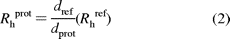

Disordered conformations: https://pubmed.ncbi.nlm.nih.gov/28793210/

Review of diffusion NMR for Rh:https://pubs.acs.org/doi/10.1021/bi991765q

Review of diffusion NMR for unfodled states: https://pubs.acs.org/doi/pdf/10.1021/acs.analchem.8b05617

alpha-CyD Rh: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2812710/

Translational diffusion theory: https://link.springer.com/article/10.1140/epje/i2012-12130-x



In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import pandas as pd

In [109]:
def parse_diff_report(filename,start=0,end=-1):
    D_ref = 1.62e-9 #m2/s  dioxane
    Rh_ref = 2.12 # dioxane
    diffcon = []
    line_idx = []
    gradient = []
    expt = []
    calc = []
    
    with open(filename, 'r') as f:
        lines = f.readlines()
    for i,line in enumerate(lines):
        if 'Diff Con.' in line:
            line_idx.append(i)
            value = line.split()[3]
            if value != 'inf':
                diffcon.append(float(value))
    Rh_prot = (D_ref/np.array(diffcon)) * Rh_ref
    
    for i in line_idx[start:end]:
        data = lines[i+10:i+42]
        g = []
        e = []
        c = []
        for d in data:
            lsplit = d.split()
            if len(lsplit) == 5:
                g.append(float(lsplit[1]))
                e.append(float(lsplit[2]))
                c.append(float(lsplit[3]))
        gradient.append(g)
        expt.append(e)
        calc.append(c)
    parsed_data = np.array([gradient, expt, calc])
    return (parsed_data, Rh_prot[start:end].mean(), Rh_prot[start:end].std(), \
            diffcon[start:end], Rh_prot[start:end])

In [113]:
WT = parse_diff_report('WT_diff_fitting_report_2.txt', start=-5, end=-2)
EL = parse_diff_report('EL_diff_fitting_report_2.txt', start=-5, end=-2)
SL = parse_diff_report('SL_diff_fitting_report_2.txt', start=-5, end=-2)
SR = parse_diff_report('polyS_diff_fitting_report_2.txt', start=0, end=3)

df = pd.DataFrame()
df['protein'] = ['WT','polyS','shortened','extended']
df['N'] = [330,330,316,355]
df['Mw'] = [34567.6,34287.29,33186.25,37126.64]
df['rH_ave']  = [WT[1],SR[1],SL[1],EL[1]]
df['rH_err']  = [WT[2],SR[2],SL[2],EL[2]]
df['rh_values'] = [WT[4],SR[4],SL[4],EL[4]]

df

/tmp/ipykernel_2479/4280424347.py:34: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  parsed_data = np.array([gradient, expt, calc])


,protein,N,Mw,rH_ave,rH_err,rh_values
0,WT,330,34567.60,30.170757,0.100189,"[30.099912357581072, 30.099912357581072, 30.31..."
1,polyS,330,34287.29,29.997983,0.311159,"[30.3929203539823, 29.96858638743456, 29.63244..."
2,shortened,316,33186.25,29.475712,0.357859,"[29.96858638743456, 29.12977099236641, 29.3287..."
3,extended,355,37126.64,31.405868,0.631652,"[30.555160142348758, 31.595216191352346, 32.06..."


In [ ]:
fig, axs = plt.subplots(3,4, sharex=True, figsize=(8,6), constrained_layout=True)

data = [WT, SR, SL, EL]
titles = ['WT', 'SR', 'SL', 'EL']
for k,d in enumerate(data):
    for i in range(3):

        axs[i][k].plot(d[0][0][i], d[0][1][i], '.k', label='data')
        axs[i][k].plot(d[0][0][i], d[0][2][i], 'r-', label='fit')
        #string = '$D_t=${:.1e}'.format(d[3][i]) + '$ m^{2}s^{-1}$\n$R_h=$' + '{:.1f}'.format(d[4][i]) + ' Å'
        #axs[i][k].text(30, d[0][1][i][-1]*1.5, string)
        
        if i == 0:
            axs[i][k].set_title(titles[k])
        
        if i == 0 and k == 0:
            axs[i][k].legend(loc='uppler right', prop={'size': 8})
            axs[i][k].set_xticks([10,25,40])
            
            
fig.supylabel('Integrals', fontsize=14)
fig.supxlabel('Gradient  \ $Gcm^{-1}$')
plt.savefig('dosy_fit.png', dpi=300)
plt.show()